# related articles

LAB Intro
1. https://rawpedia.rawtherapee.com/RGB_and_Lab


Auto color correction  
[paper](https://arxiv.org/pdf/1910.13688v1.pdf)
[code](https://github.com/pvnieo/Low-light-Image-Enhancement)


[Gmlight](https://paperswithcode.com/paper/gmlight-lighting-estimation-via-geometric)



# Ideas

## Idea 1
change image to LAB color space and adjust light to same value before extract the features



In [1]:

# 0 = 90CounterCLockwise and Vertical Flip (default)
# 1 = 90Clockwise
# 2 = 90CounterClockwise
# 3 = 90Clockwise and Vertical Flip

# ! rm ./data/video/tmp/*
# ! ffmpeg -i ./data/video/1.avi  -vf "fps=1,transpose=1" ./data/video/tmp/output%04d.png


# Test Color correction

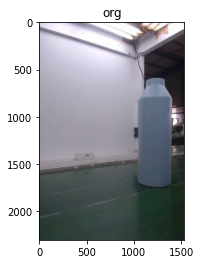

In [2]:
# test color correction
# 3p
import cv2
from tqdm import tqdm
# project
from util.exposure_enhancement import enhance_image_exposure
import matplotlib.pyplot as plt
import numpy as np

image_name = './data/zerobox_light/images/babyblue01/output0079.png'
image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("org")
plt.show()

gamma = 0.6
lambda_ = 0.15
sigma=3
bc =1
bs=1
be = 1
eps = 1e-3

# correct color
# enhanced_image = enhance_image_exposure(image, gamma, lambda_, dual=True,
#                                 sigma=sigma, bc=bc, bs=bs, be=be, eps=eps)

# plt.imshow(enhanced_image)
# plt.title("enhanced_image")
# plt.show()


In [3]:
# enhanced_image2 = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
# cv2.imwrite("enhanced_bottle.png",enhanced_image2)

{'data': {'image_name': './data/zerobox_nobg/images/beige01/output0006.png',
          'keyword': '',
          'model_name': 'vgg16',
          'sid': 'beige01',
          'tags': ['beige01'],
          'uuid': '63a89f84-b043-4d76-bf82-7264b1114e79'},
 'score': 0.723547101020813,
 'vearch_id': '63a89f84-b043-4d76-bf82-7264b1114e79'}


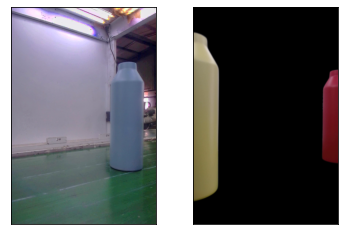

In [4]:
import cv2
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
from pprint import pprint
from util.trainingutil import AlphaBgTransform

model_name = "vgg16"
image_name = "./enhanced_bottle.png"
util = VearchUtil(model_name=model_name)
item = util.search_by_image(image=image_name)

pprint(item)

image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(item["data"]["image_name"])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

TestUtil.plot_images([image,image2])


(2304, 1536, 3)


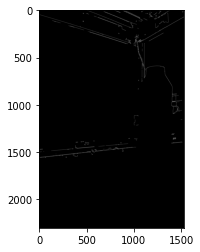

In [5]:
import cv2
import matplotlib.pyplot as plt
 
image_name = './data/zerobox_light/images/babyblue01/output0079.png'
img = cv2.imread(image_name)
edges = cv2.Canny(img,100,200)
image2 = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

pprint(image2.shape)
 
plt.imshow(image2)
plt.show()
 


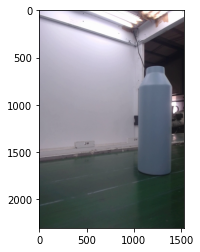

(2304, 1536, 3)
(6, 255, 127.39885090015552)


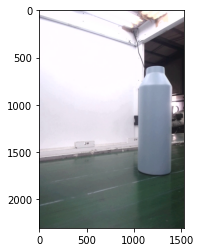

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
 
image_name = './data/zerobox_light/images/babyblue01/output0079.png'
image = cv2.imread(image_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

image2 = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
pprint(image.shape)

min = np.min(image2[:,:,0])
max = np.max(image2[:,:,0])
mean = np.mean(image2[:,:,0])
pprint((min,max,mean))
image2 = image2.astype("float32")

image2[:,:,0] *= (180.0/mean)
image2[image2[:,:,0] > 255,0 ] = 255 

image2 = image2.astype("uint8")
image3 = cv2.cvtColor(image2,cv2.COLOR_Lab2RGB)

plt.imshow(image3)
plt.show()
plt.imsave("color_corrected.png",image3)
 

{'data': {'image_name': './data/zerobox_nobg/images/babyblue01/output0070.png',
          'keyword': '',
          'model_name': 'vgg16',
          'sid': 'babyblue01',
          'tags': ['babyblue01'],
          'uuid': '9ef7ba90-a38f-4952-88e6-8dc4d52db834'},
 'score': 0.7657526135444641,
 'vearch_id': '9ef7ba90-a38f-4952-88e6-8dc4d52db834'}


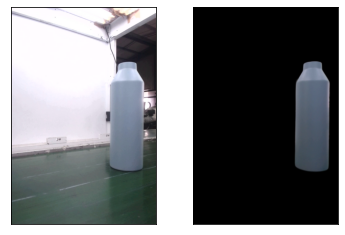

In [7]:
import cv2
import matplotlib.pyplot as plt
from util.vearchutil import VearchUtil
 

model_name = "vgg16"
image_name = './color_corrected.png'
util = VearchUtil(model_name=model_name)
item = util.search_by_image(image=image_name)

pprint(item)

image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(item["data"]["image_name"])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

TestUtil.plot_images([image,image2])

' corect result'
' corect result'
result 2/6


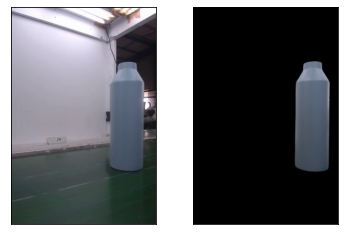

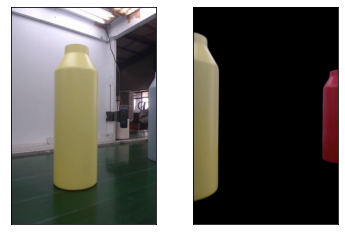

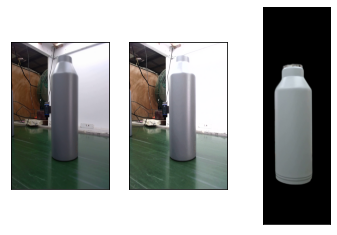

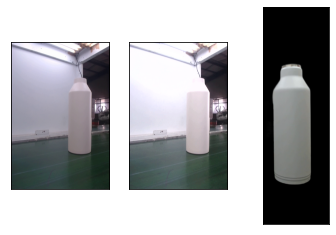

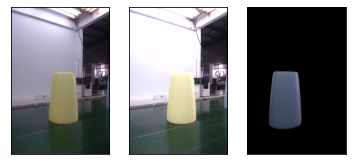

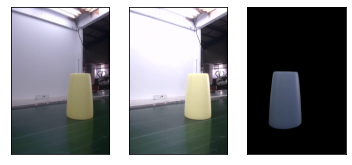

In [8]:
from util.testutil import TestUtil
import cv2
import matplotlib.pyplot as plt

model_name = "vgg16"
image_name = './data/zerobox_light/images/babyblue01/output0079.png'

wrong_images = ['./data/zerobox_light/images/babyblue01/output0079.png',
 './data/zerobox_light/images/beige01/output0072.png',
 './data/zerobox_light/images/lavender01/output0084.png',
 './data/zerobox_light/images/white02/output0064.png',
 './data/zerobox_light/images/yellow03/bumbler0021.png',
 './data/zerobox_light/images/yellow03/bumbler0022.png']

testUtil = TestUtil(model_name)
cnt_correct = 0
for image_name in wrong_images:
    (correct,images) = testUtil.test_color_correction(image_name=image_name)
    if correct is True:
        cnt_correct += 1

    TestUtil.plot_images(images)

print(f"result {cnt_correct}/{len(wrong_images)}")

# test background removal

In [9]:
# !pip install rembg

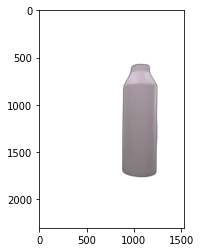

'blackbottles: blackbottles'


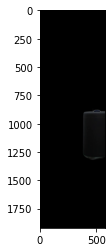

'white02: white02'


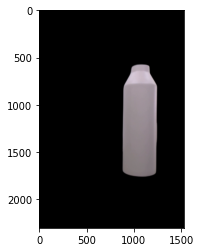

'white02: babyblue01'


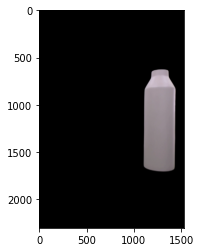

'white03: beige01'


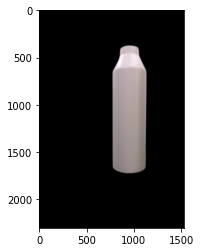

'yellow03: babyblue02'


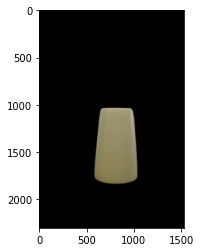

'yellow03: white01'


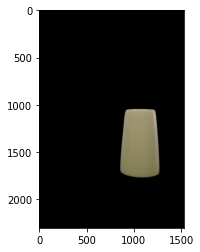

result: 2/6


In [10]:
from rembg.bg import remove
import numpy as np
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import io
from pprint import pprint

wrong_images = ['./data/zerobox_light/images/babyblue01/output0079.png',
 './data/zerobox_light/images/beige01/output0072.png',
 './data/zerobox_light/images/lavender01/output0084.png',
 './data/zerobox_light/images/white02/output0064.png',
 './data/zerobox_light/images/yellow03/bumbler0021.png',
 './data/zerobox_light/images/yellow03/bumbler0022.png']


wrong_images = ['./data/zerobox_nobg/images/blackbottles/000037.png',
 './data/zerobox_nobg/images/white02/output0064.png',
 './data/zerobox_nobg/images/white02/output0065.png',
 './data/zerobox_nobg/images/white03/output0065.png',
 './data/zerobox_nobg/images/yellow03/bumbler0021.png',
 './data/zerobox_nobg/images/yellow03/bumbler0022.png']


f = np.fromfile(wrong_images[1])
result = remove(f)
image = Image.open(io.BytesIO(result)).convert("RGBA")
image.save("bg_removed.png")

plt.imshow(image)
plt.show()

# # pil_image = PIL.Image.open('image.jpg')
# opencvImage = cv2.cvtColor(numpy.array(pil_image), cv2.COLOR_RGB2BGR)
model_name = "vgg16"
vearchutil = VearchUtil(model_name)
testUtil = TestUtil(model_name)
images = []

cnt_correct = 0
for image_name in wrong_images:
    image = testUtil.remove_bg(image_name)
    
    # images.append(image)
    sid = image_name.split('/')[-2]
    item = vearchutil.search_by_image(image=image)

    pprint(f"{sid}: {item['data']['sid']}")
    if sid == item["data"]["sid"]:
        cnt_correct += 1

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

print(f"result: {cnt_correct}/{len(wrong_images)}")

In [11]:
# from util.load_bottles import create_nobg_dataset

# create_nobg_dataset()

INFO 2021-12-03 15:50:19,722 load_bottles 160232 139895584524096 create_nobg_dataset(./data/zerobox, ./data/zerobox_nobg)


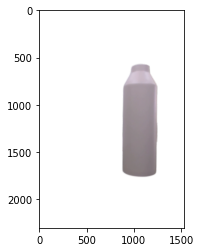

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


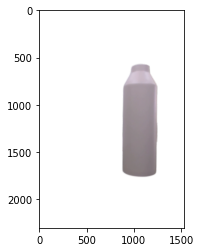

In [12]:
from rembg.bg import remove
import numpy as np
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import io
from pprint import pprint



wrong_images = ['./data/zerobox_nobg/images/blackbottles/000037.png',
 './data/zerobox_nobg/images/white02/output0064.png',
 './data/zerobox_nobg/images/white02/output0065.png',
 './data/zerobox_nobg/images/white03/output0065.png',
 './data/zerobox_nobg/images/yellow03/bumbler0021.png',
 './data/zerobox_nobg/images/yellow03/bumbler0022.png']

f = np.fromfile(wrong_images[1])
result = remove(f,alpha_matting=True)
image = Image.open(io.BytesIO(result)).convert("RGBA")
image.save("bg_removed.png")

plt.imshow(image)
plt.show()

# # pil_image = PIL.Image.open('image.jpg')
# opencvImage = cv2.cvtColor(np.array(image), cv2.COLOR_RGBA2BGRA)

opencvImage = cv2.imread('bg_removed.png', cv2.IMREAD_UNCHANGED)
opencvImage = cv2.cvtColor(opencvImage,cv2.COLOR_BGRA2RGBA)

print(opencvImage[:,:,3])



plt.imshow(opencvImage)
plt.show()

arr2 = opencvImage[:,:,3]

In [14]:
arr = opencvImage[:,:,3]

idx = np.transpose(np.nonzero(arr))

h = opencvImage.shape[0]
w = opencvImage.shape[1]

lt = min(idx[0])
bt = max(idx[-1])

pprint((lt,bt))
lt = lt - 10 if lt-10 > 0 else 0
bt = bt + 10 if bt+ 10 < max(h,w) else max(h,w)
pprint((lt,bt))

pprint(opencvImage.shape)

croped_image = opencvImage[lt:bt,lt:bt,:]

plt.imshow(croped_image)
plt.show()

arr2 = croped_image[:,:,3]
# arr2[arr2>0] = 255
vis2 = cv2.cvtColor(arr2, cv2.COLOR_GRAY2BGR)
plt.imshow(vis2)
plt.show()
# plt.imsave('maske.png',arr2)

# resize
resized = cv2.resize(croped_image, (224,224), interpolation = cv2.INTER_CUBIC)

plt.imshow(resized)
plt.show()

from util.trainingutil import AlphaBgTransform

t2 = AlphaBgTransform.to_square(croped_image)
# t2 = np.clip(t2 * 255, 0, 255).astype("uint8")
t2 = cv2.cvtColor(t2,cv2.COLOR_RGBA2BGRA)
cv2.imwrite("test.png",t2)
plt.imshow(t2)
plt.show()

r2 = cv2.resize(t2, (224,224), interpolation = cv2.INTER_CUBIC)
plt.imshow(r2)
plt.show()

t3 = AlphaBgTransform()(croped_image)
t3 = t3.permute(1,2,0).cpu().detach().numpy()
plt.imshow(t3)
plt.show()

TypeError: 'numpy.uint8' object is not callable

In [ ]:
# test transform
from torchvision import datasets, transforms, models

transform = transforms.Compose([
        # transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485], std=[0.229]),
        transforms.Normalize(mean=[0.485, 0.456, 0.406,0.9], std=[0.229, 0.224, 0.225,0.2]),
])
# image = (image - mean) / std
# image = ((image * std) + mean)

# tensor = transform(croped_image)
img = croped_image.astype("float64")
mean=[0.485, 0.456, 0.406,0.9]
std=[0.229, 0.224, 0.225,0.2]
t_img = (croped_image - mean) / std

pprint(t_img[:,:,1])

plt.imshow(t_img)
plt.show()

plt.imshow(t_img[:,:,3])
plt.show()

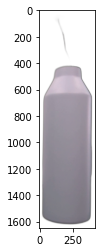

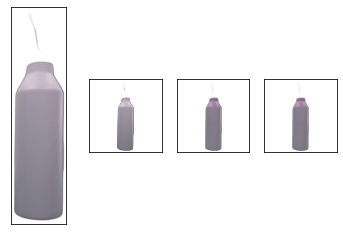

In [1]:
import cv2
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
from pprint import pprint
from util.trainingutil import AlphaBgTransform
import matplotlib.pyplot as plt

wrong_images = ['./data/zerobox_nobg/images/blackbottles/000037.png',
 './data/zerobox_nobg/images/white02/output0064.png',
 './data/zerobox_nobg/images/white02/output0065.png',
 './data/zerobox_nobg/images/white03/output0065.png',
 './data/zerobox_nobg/images/yellow03/bumbler0021.png',
 './data/zerobox_nobg/images/yellow03/bumbler0022.png']

model_name = "vgg16"
image_name = wrong_images[1]
# util = VearchUtil(model_name=model_name)
# item = util.search_by_image(image=image_name)

# pprint(item)

image = cv2.imread(image_name,cv2.IMREAD_UNCHANGED)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image2 = cv2.imread(item["data"]["image_name"],cv2.IMREAD_UNCHANGED)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# TestUtil.plot_images([image,image2])


t1 = AlphaBgTransform.center_crop(image)

plt.imshow(t1)
plt.show()

t2 = AlphaBgTransform.to_square(t1)
t3 = AlphaBgTransform.resize(t2,224)
t4 = AlphaBgTransform.enhance_color(t3)

TestUtil.plot_images([t1,t2,t3,t4])